# 6. Introdução ao Machine Learning
## 6.1 Importação e visualização do banco de dados

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot
import seaborn as sns
%matplotlib inline
np.random.seed(0)

In [2]:
# Importando os arquivos
test_path = '/kaggle/input/titanic/test.csv'
train_path = '/kaggle/input/titanic/train.csv'

test_data = pd.read_csv(test_path)
train_data = pd.read_csv(train_path)

# Gerando momentos estatítiscos sobre o dataframe de treino
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# Identificando as features categóricas e as numéricas
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Separando as features numéricas
cat = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
num_dis = ['PassengerId','Survived','Pclass','SibSp','Parch']
num_con = ['Age', 'Fare']

In [5]:
# Identificando quais features contém dados faltantes
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Quantos NaN há
train_data.isnull().sum().sum()

866

In [7]:
# Identificando as features númericas do banco de dados de teste
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
# Identificando as features númericas do banco de dados de treino
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Criando novo dataframe de treino apenas com as features numéricas
notCat1 = ['PassengerId','Pclass','Age','SibSp','Parch','Fare']
notCat2 = ['PassengerId','Survived','Pclass','Age','SibSp','Parch', 'Fare']

df1 = test_data[notCat1]
df2 = train_data[notCat2]
df1

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500
414,1306,1,39.0,0,0,108.9000
415,1307,3,38.5,0,0,7.2500
416,1308,3,NaN,0,0,8.0500


In [10]:
# Retirando as linhas que contém NaN do dataframe de treino
df2 = df2.dropna()
df2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
889,890,1,1,26.0,0,0,30.0000


In [11]:
# Substituindo os valores faltantes pelo valor 0 no dataframe de teste
df1 = df1.fillna(0)
df1

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,0.0,0,0,8.0500
414,1306,1,39.0,0,0,108.9000
415,1307,3,38.5,0,0,7.2500
416,1308,3,0.0,0,0,8.0500


## 6.2 Exploração do banco de dados

In [12]:
# Visualização do dataframe
df2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
889,890,1,1,26.0,0,0,30.0000


In [13]:
# Lista com os grupos em que as idades serão repartidas
age_groups = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']

# Separando as idades em oito grupos e criando nova coluna com os grupos
df2['AgeGroups'] = pd.cut(df2['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=age_groups)
df2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeGroups
0,1,0,3,22.0,1,0,7.2500,20-30
1,2,1,1,38.0,1,0,71.2833,30-40
2,3,1,3,26.0,0,0,7.9250,20-30
3,4,1,1,35.0,1,0,53.1000,30-40
4,5,0,3,35.0,0,0,8.0500,30-40
...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,30-40
886,887,0,2,27.0,0,0,13.0000,20-30
887,888,1,1,19.0,0,0,30.0000,10-20
889,890,1,1,26.0,0,0,30.0000,20-30


In [14]:
# AgeGroups coluna categórica
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  714 non-null    int64   
 1   Survived     714 non-null    int64   
 2   Pclass       714 non-null    int64   
 3   Age          714 non-null    float64 
 4   SibSp        714 non-null    int64   
 5   Parch        714 non-null    int64   
 6   Fare         714 non-null    float64 
 7   AgeGroups    714 non-null    category
dtypes: category(1), float64(2), int64(5)
memory usage: 45.7 KB


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='AgeGroups', ylabel='Survived'>

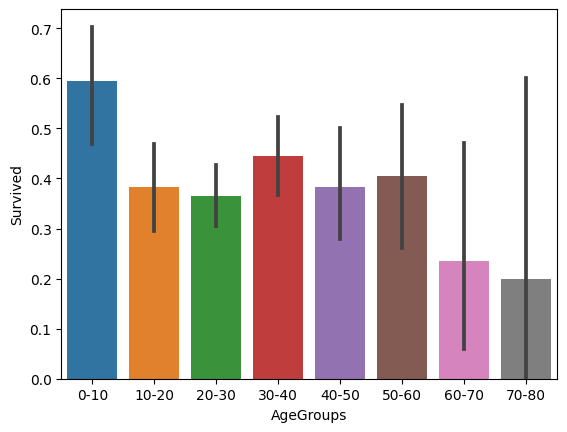

In [15]:
# Gráfico que indica a chance de sobrevivência por grupo de idade
df_graphic = df2[['Survived','AgeGroups']]
sns.barplot(x=df_graphic['AgeGroups'], y=df_graphic['Survived'])

Crianças de 0 a 10 anos tinham mais chance de sobrevivência provavelmente devido a prioridade de resgate.

<Axes: xlabel='Pclass', ylabel='Survived'>

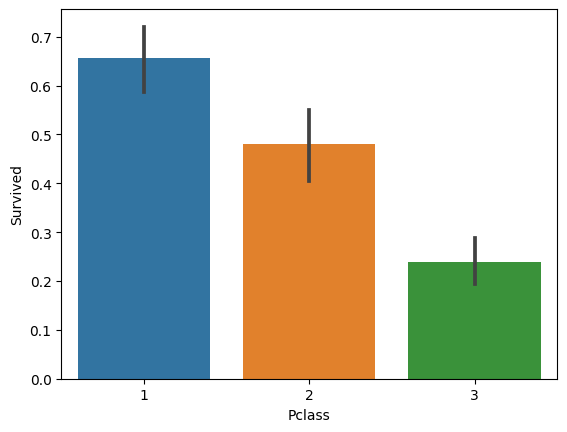

In [16]:
# Gráfico que indica a chance de sobrevivência por classe da passagem
sns.barplot(x=df2['Pclass'], y=df2['Survived'])

Provável prioridade no resgate por serem pessoas com maior poder aquisitivo aumentaram a taxa de sobrevivência dessas pessoas.

<Axes: xlabel='SibSp', ylabel='Survived'>

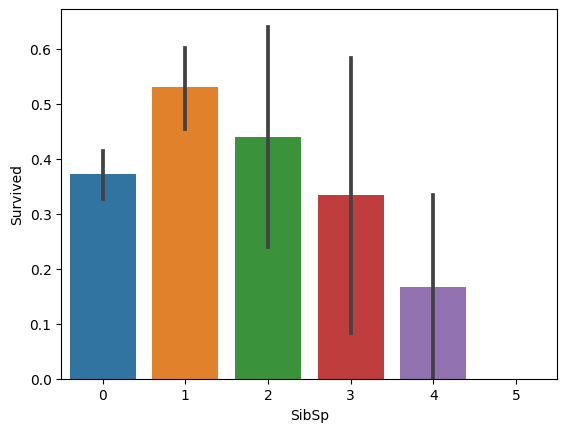

In [17]:
# Gráfico que indica a chance de sobrevivência por número de irmãos/cônjuges
sns.barplot(x=df2['SibSp'], y=df2['Survived'])

Prioridade aos passegeiros com um a dois familiares presentes. 

<Axes: xlabel='Parch', ylabel='Survived'>

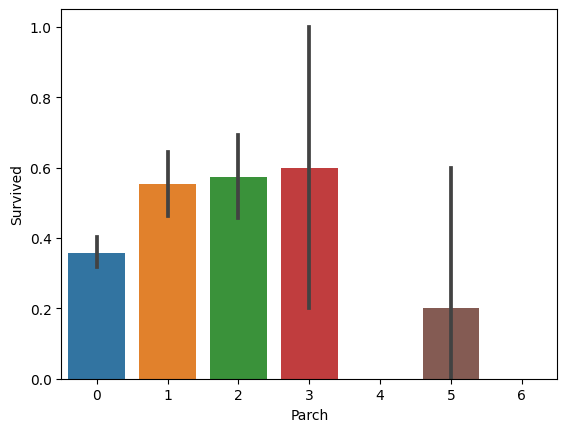

In [18]:
# Gráfico que indica a chance de sobrevivência por número de pais/filhos
sns.barplot(x=df2['Parch'], y=df2['Survived'])

Como visto no gráfico anterior, pessoas com filhos ou pais foram priorizados para manter famílias vivas.

## 6.3 Treinamento do modelo e submissão das predições

In [19]:
# Retirando a coluna que contém o ID dos passageiros
df_dropped = df2.drop(['PassengerId'], axis=1)
df_dropped

,Survived,Pclass,Age,SibSp,Parch,Fare,AgeGroups
0,0,3,22.0,1,0,7.2500,20-30
1,1,1,38.0,1,0,71.2833,30-40
2,1,3,26.0,0,0,7.9250,20-30
3,1,1,35.0,1,0,53.1000,30-40
4,0,3,35.0,0,0,8.0500,30-40
...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,30-40
886,0,2,27.0,0,0,13.0000,20-30
887,1,1,19.0,0,0,30.0000,10-20
889,1,1,26.0,0,0,30.0000,20-30


In [20]:
# Informações do dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  714 non-null    int64   
 1   Survived     714 non-null    int64   
 2   Pclass       714 non-null    int64   
 3   Age          714 non-null    float64 
 4   SibSp        714 non-null    int64   
 5   Parch        714 non-null    int64   
 6   Fare         714 non-null    float64 
 7   AgeGroups    714 non-null    category
dtypes: category(1), float64(2), int64(5)
memory usage: 45.7 KB


In [21]:
# Criando variável X com os dados das features
X = df_dropped.drop(['AgeGroups','Survived'], axis=1)

# Criando variável y com o target 
y = df2['Survived']

# Importando a biblioteca
from sklearn.model_selection import train_test_split

# Usando Train Test Split para separar o treino e validação
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.8, random_state=1)

In [22]:
# Importando as bibliotecas
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Treinando random forest com as features e o target de treino
model = RandomForestClassifier(random_state=1)
model.fit(train_X, train_y)

# Realizando a predição
pred = model.predict(test_X)

# Validando a predição, comparando com o target da validação
accuracy_score(test_y, pred)

0.6783216783216783

Pontuação não satisfatória.

In [23]:
# Treinando novamente o modelo
model.fit(X, y)
prediction = model.predict(df1.drop('PassengerId', axis=1)) 

# Criando um DataFrame com os mesmos índices dos dados de teste e as predições feitas pelo modelo
idx = df1.index 
predictions_df = pd.DataFrame({
    'PassengerId': df1['PassengerId'], 
    'Survived': prediction 
})

# Salvando em arquivo csv
predictions_df.to_csv('predictions.csv', index=False)
predictions_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


# 7. Machine Learning Clássico
## 7.1 Data Cleaning

In [24]:
# Coluna e seu respectivo tipo de dado do banco de dados de teste
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [25]:
# Coluna e seu respectivo tipo de dadpo do banco de dados de treino
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
# Quantidade de valores nulos de cada feature do banco de dados de teste
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [27]:
# Quantidade de valores nulos de cada feature do banco de dados de treino
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
# Copiando os dataframes
X_test = test_data.copy()
X_train = train_data.copy()

In [29]:
# Dropando as features "Cabin" e "Ticket"
X_test = X_test.drop(['Cabin', 'Ticket'], axis=1)
X_train = X_train.drop(['Cabin', 'Ticket'], axis=1)

In [30]:
# Manipulando a feature "Age"
median1 = X_test['Age'].median()
X_test['Age'].fillna(median1, inplace=True)

median2 = X_train['Age'].median()
X_train['Age'].fillna(median2, inplace=True)

<ipython-input-30-b8679374b8ce>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['Age'].fillna(median1, inplace=True)
<ipython-input-30-b8679374b8ce>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [31]:
# Manipulando a feature "Fare"
median3 = X_test['Fare'].median()
X_test['Fare'].fillna(median3, inplace=True)

median4 = X_train['Fare'].median()
X_train['Fare'].fillna(median4, inplace=True)

<ipython-input-31-7f526e1c51a5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['Fare'].fillna(median3, inplace=True)
<ipython-input-31-7f526e1c51a5>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [32]:
# Manipulando a feature "Embarked"
X_test['Embarked'].fillna(X_test['Embarked'].mode(), inplace=True)
X_train['Embarked'].fillna(X_train['Embarked'].mode(), inplace=True)

<ipython-input-32-fabd55c49131>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['Embarked'].fillna(X_test['Embarked'].mode(), inplace=True)
<ipython-input-32-fabd55c49131>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [33]:
# Criando feature que separa a feature "Age" em 5 intervalos de mesma extensão
X_test['AgeGroups'] = pd.cut(X_test['Age'], 5)
X_train['AgeGroups'] = pd.cut(X_train['Age'], 5)

In [34]:
# Criando feature que separa a feature "Fare" em 6 intervalos com o mesmo número de dados
X_test['FareGroups'] = pd.qcut(X_test['Fare'], 6)
X_train['FareGroups'] = pd.qcut(X_train['Fare'], 6)

In [35]:
# Visualização do dataframe de teste
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroups,FareGroups
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,"(30.502, 45.668]","(7.762, 8.662]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,"(45.668, 60.834]","(-0.001, 7.762]"
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,"(60.834, 76.0]","(8.662, 14.454]"
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,"(15.336, 30.502]","(7.762, 8.662]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,"(15.336, 30.502]","(8.662, 14.454]"
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,8.0500,S,"(15.336, 30.502]","(7.762, 8.662]"
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,"(30.502, 45.668]","(55.969, 512.329]"
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,"(30.502, 45.668]","(-0.001, 7.762]"
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,8.0500,S,"(15.336, 30.502]","(7.762, 8.662]"


In [36]:
# Visualização do dataframe de treino
X_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroups,FareGroups
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,"(16.336, 32.252]","(-0.001, 7.775]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,"(32.252, 48.168]","(52.369, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,"(16.336, 32.252]","(7.775, 8.662]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,"(32.252, 48.168]","(52.369, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,"(32.252, 48.168]","(7.775, 8.662]"
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,"(16.336, 32.252]","(8.662, 14.454]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,"(16.336, 32.252]","(26.0, 52.369]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,"(16.336, 32.252]","(14.454, 26.0]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,"(16.336, 32.252]","(26.0, 52.369]"
